In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Read file
cars = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
# Get information on columns and types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# Retain the first part of the field in car name as given in the question
cars['CarName'] = cars['CarName'].str.split(' ').str[0]

In [8]:
# Correct the values in car name
cars.replace('maxda','mazda', inplace = True)
cars.replace('Nissan','nissan', inplace = True)
cars.replace('porcshce','porsche', inplace = True)
cars.replace('toyouta','toyota', inplace = True)
cars.replace('vokswagen','volkswagen', inplace = True)
cars.replace('vw','volkswagen', inplace = True)

In [9]:
# Create a new column to indicate premium and non-premium cars 
# Preimum cars are cars belonging to brands: Alfa-Romeo, Audi, BMW, Buick, Mercury, Porsche, Jaguar, Volvo
cars['premium'] = cars['CarName'].apply(lambda x: 1 if x in ['alfa-romero', 'audi', 'bmw', 'buick', 'mercury', 
                                                                       'porsche', 'jaguar', 'volvo'] else 0)

In [10]:
cars['premium'].unique()

array([1, 0], dtype=int64)

In [11]:
# Drop car name as the premium column will be used for analysis
cars.drop(['CarName'],axis=1,inplace=True)

In [12]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,premium
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.224390
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.418201
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,0.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


In [13]:
#Q1 = cars.quantile(0.25)
#Q3 = cars.quantile(0.75)
#IQR = Q3 - Q1
#cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(cars.describe())

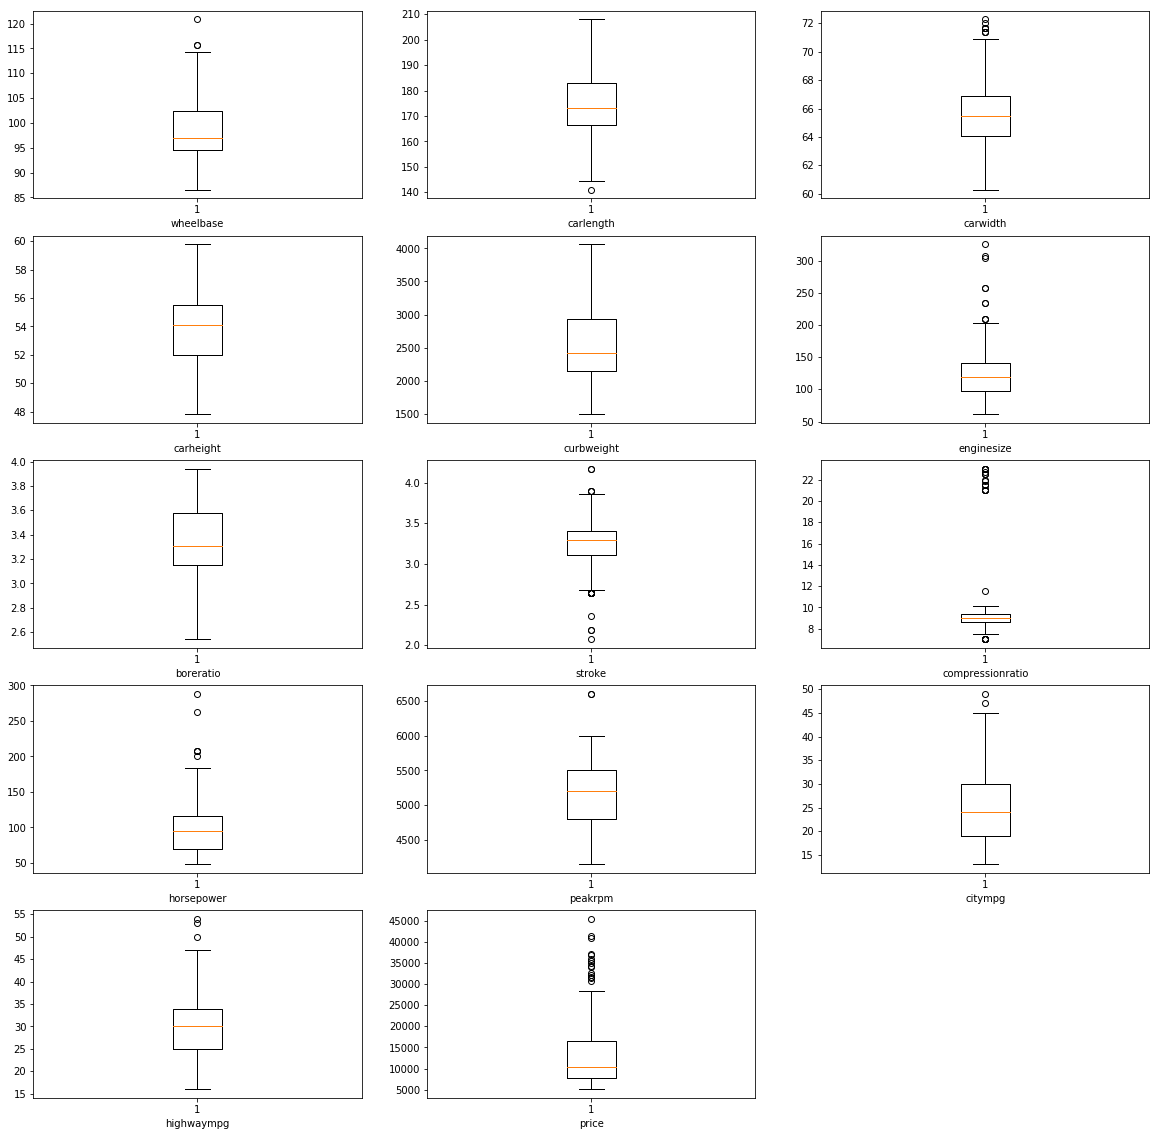

In [14]:
# Analysis on continuous or quantitative variables
fig = plt.figure(figsize = (20,20))

def cont_plots(plot_row,plot_col,plot_index, df, column):
    ax = fig.add_subplot(plot_row,plot_col,plot_index)
    plt.boxplot(df[column])
    ax.set_xlabel(column)
 
cont_plots(5,3,1,cars,'wheelbase')
cont_plots(5,3,2,cars,'carlength')
cont_plots(5,3,3,cars,'carwidth')
cont_plots(5,3,4,cars,'carheight')
cont_plots(5,3,5,cars,'curbweight')
cont_plots(5,3,6,cars,'enginesize')
cont_plots(5,3,7,cars,'boreratio')
cont_plots(5,3,8,cars,'stroke')
cont_plots(5,3,9,cars,'compressionratio')
cont_plots(5,3,10,cars,'horsepower')
cont_plots(5,3,11,cars,'peakrpm')
cont_plots(5,3,12,cars,'citympg')
cont_plots(5,3,13,cars,'highwaympg')
cont_plots(5,3,14,cars,'price')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

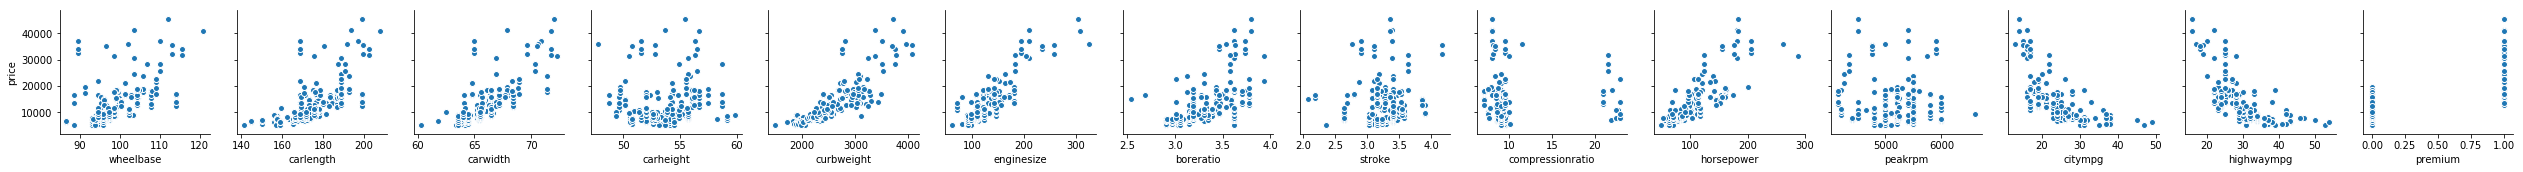

In [16]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(cars, x_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'premium'], y_vars='price', kind = 'scatter')

In [17]:
cars = cars.drop(['carheight','compressionratio','peakrpm', 'wheelbase','stroke', 'citympg', 'highwaympg', 'boreratio'],1)

In [18]:
## List of categorical variables in the data:
# fueltype = gas ,diesel
# aspiration = std, turbo
# doornumber = two, four
# carbody = convertible, hatchback, sedan, wagon, hardtop
# drivewheel = rwd, fwd, 4wd
# enginelocation = front, rear
# enginetype = dohc, ohcv, ohc, l, rotor, ohcf, dohcv
# cylindernumber = two, three, four, five, six, eight, twelve
# fuelsystem = mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi
# symboling = 3, 2, 1, 0, -1, -2
# CarName = alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, buick, 
#           mercury, mitsubishi, nissan, peugeot, plymouth, porsche, renault, saab, subaru, toyota,
#           volkswagen, volvo

In [19]:
# Dropping variables not used in analysis
cars.drop(['car_ID'],axis=1,inplace=True)

In [20]:
cars.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'horsepower', 'price', 'premium'],
      dtype='object')

In [21]:
# Address categorical variables

cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'turbo': 0, 'std': 1})
cars['doornumber'] = cars['doornumber'].map({'four': 1, 'two': 0})

# Creating dummy variable for variable "carbody" and dropping the first one
carbody_status = pd.get_dummies(cars['carbody'],drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,carbody_status],axis=1)
cars.drop(['carbody'],axis=1,inplace=True)

# Creating dummy variable for variable "drivewheel" and dropping the first one
drivewheel_status = pd.get_dummies(cars['drivewheel'],drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,drivewheel_status],axis=1)
cars.drop(['drivewheel'],axis=1,inplace=True)

cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})

# Creating dummy variable for variable "enginetype" and dropping the first one
enginetype_status = pd.get_dummies(cars['enginetype'],drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,enginetype_status],axis=1)
cars.drop(['enginetype'],axis=1,inplace=True)

# Creating dummy variable for variable "cylindernumber" and dropping the first one
cylindernumber_status = pd.get_dummies(cars['cylindernumber'],drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,cylindernumber_status],axis=1)
cars.drop(['cylindernumber'],axis=1,inplace=True)

# Creating dummy variable for variable "fuelsystem" and dropping the first one
fuelsystem_status = pd.get_dummies(cars['fuelsystem'],drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,fuelsystem_status],axis=1)
cars.drop(['fuelsystem'],axis=1,inplace=True)

# Creating dummy variable for variable "symboling" and dropping the first one
#symboling_status = pd.get_dummies(cars['symboling'],drop_first=True)
#Adding the results to the master dataframe
#cars = pd.concat([cars,symboling_status],axis=1)
cars.drop(['symboling'],axis=1,inplace=True)

In [22]:
cars = cars.apply(lambda x: pd.to_numeric(x,errors='ignore'))

In [23]:
# Putting feature variable to X
X = cars.loc[:, cars.columns != 'price']

# Putting response variable to y
y = cars['price']

In [24]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

C:\Users\Harish\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [26]:
# applying normalize ( ) to all columns 
X_train[['carlength', 'carwidth','curbweight', 'enginesize', 'horsepower']] = X_train[['carlength', 'carwidth','curbweight', 'enginesize', 'horsepower']].apply(normalize)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 35 columns):
fueltype          143 non-null int64
aspiration        143 non-null int64
doornumber        143 non-null int64
enginelocation    143 non-null int64
carlength         143 non-null float64
carwidth          143 non-null float64
curbweight        143 non-null float64
enginesize        143 non-null float64
horsepower        143 non-null float64
premium           143 non-null int64
hardtop           143 non-null uint8
hatchback         143 non-null uint8
sedan             143 non-null uint8
wagon             143 non-null uint8
fwd               143 non-null uint8
rwd               143 non-null uint8
dohcv             143 non-null uint8
l                 143 non-null uint8
ohc               143 non-null uint8
ohcf              143 non-null uint8
ohcv              143 non-null uint8
rotor             143 non-null uint8
five              143 non-null uint8
four              143 non-null uin

In [28]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False  True False  True  True  True False  True False False
 False False False False  True False False False False False  True  True
  True False  True False False False False False False False False]
[ 7 24 22  1  8  1  1  1  2  1 15 14 17 16 18 19  1 12 10 11  3  6  1  1
  1  5  1  4 20 21 13 25 23  9 26]


In [29]:
col = X_train.columns[rfe.support_]

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
#lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [33]:
# function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [34]:
# Calculating VIF value
vif_cal(input_data = pd.concat([X_train_rfe, y_train], axis = 1), dependent_col = 'price')

,Var,Vif
0,const,181.07
4,enginesize,8.19
3,curbweight,8.16
2,carwidth,5.70
8,four,4.44
9,six,4.44
7,five,2.44
5,premium,2.11
10,twelve,1.87
6,dohcv,1.30


In [34]:
X_train_rfe = X_train_rfe.drop('two',1)

In [35]:
vif_cal(input_data = pd.concat([X_train_rfe, y_train], axis = 1), dependent_col = 'price')

,Var,Vif
0,const,246.83
7,four,19.79
8,six,8.83
6,five,5.99
5,rotor,3.80
4,ohcv,2.18
2,premium,1.98
9,three,1.72
3,dohcv,1.58
1,enginelocation,1.08


In [36]:
X_train_rfe = X_train_rfe.drop('four',1)

In [37]:
vif_cal(input_data = pd.concat([X_train_rfe, y_train], axis = 1), dependent_col = 'price')

,Var,Vif
0,const,157.70
2,premium,1.62
7,six,1.46
6,five,1.37
4,ohcv,1.24
1,enginelocation,1.08
3,dohcv,1.06
5,rotor,1.01
8,three,1.00


In [38]:
## BUILDING MODEL USING SKLEARN

In [39]:
X_train_rfe.columns

Index(['const', 'enginelocation', 'premium', 'dohcv', 'ohcv', 'rotor', 'five',
       'six', 'three'],
      dtype='object')

In [40]:
X_train_rfe = X_train_rfe.drop('const',1)

In [41]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           1.06e-67
Time:                        22:10:43   Log-Likelihood:                -1405.2
No. Observations:                 143   AIC:                             2826.
Df Residuals:                     135   BIC:                             2850.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation  9073.4076    455.803     19.

In [44]:
X_train_rfe = X_train_rfe.drop('five',1)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           8.50e-69
Time:                        22:11:03   Log-Likelihood:                -1405.4
No. Observations:                 143   AIC:                             2825.
Df Residuals:                     136   BIC:                             2846.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation  9103.2316    451.802     20.

In [47]:
X_train_rfe = X_train_rfe.drop('rotor',1)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           2.11e-69
Time:                        22:11:21   Log-Likelihood:                -1406.8
No. Observations:                 143   AIC:                             2826.
Df Residuals:                     137   BIC:                             2843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation  9248.6987    446.222     20.

In [87]:
X_train_rfe = X_train_rfe.drop('enginelocation',1)

In [88]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [89]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     617.3
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           2.12e-87
Time:                        21:58:30   Log-Likelihood:                -1370.2
No. Observations:                 143   AIC:                             2748.
Df Residuals:                     139   BIC:                             2760.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth    2.162e+04   1854.860     11.657      0.0

In [90]:
X_train_rfe = X_train_rfe.drop('stroke',1)

In [92]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     817.1
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           1.77e-88
Time:                        21:59:42   Log-Likelihood:                -1371.2
No. Observations:                 143   AIC:                             2748.
Df Residuals:                     140   BIC:                             2757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth    2.397e+04    766.373     31.273      0.0

In [93]:
X_train_rfe = X_train_rfe.drop('twelve',1)

In [94]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1201.
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           2.80e-89
Time:                        22:01:23   Log-Likelihood:                -1373.1
No. Observations:                 143   AIC:                             2750.
Df Residuals:                     141   BIC:                             2756.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth    2.403e+04    772.956     31.088      0.0

In [60]:
X_test = X_test[X_train_rfe.columns]

In [61]:
y_predicted = lm.predict(X_test)

In [62]:
r2 = r2_score(y_test, y_predicted)

In [63]:
r2

-65666.76631079693